# Analysis of tips.csv dataset - WORK IN PROGRESS
Data analysis of the tips.csv dataset in completion of Module 52446 "Fundamentals of Data Analysis", Higher Diploma in Data Analytics, Galway-Mayo Institute of Technology

## What is in this document


## Layout of document
Each section will start with data analysis and results, followed by a textual description and interpretation of findings.

## Prepare dataset and analysis packages

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import tips.csv dataset
df = pd.read_csv('tips.csv')

## Evaluate dataset congruency
Before conducting analysis on the dataset, it is worth determining if the dataset is complete and recorded correctly as follows:

In [3]:
# Identify column titles and first 5 rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Confirm that data correctly recorded by comparing head to tail
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


It appears that all data is entered correctly, as there does not appear to be non-sensical entries in the last 5 observations.

In [5]:
# Check across data variables for missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There does not appear to be any missing values within the dataset. That is not to say that all values entered are sensical in nature (e.g. party size of 1,000 is a valid entry, but likely incorrect). It's worth getting some basic descriptive statistics to see if the data makes sense.

## Descriptive Statistics

In [6]:
# Reveal some basic descriptive statistics of each data column
for col in df:
    print(f"Descriptive statistics for variable: {col}")
    print(df[col].describe())
    print()

Descriptive statistics for variable: total_bill
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Descriptive statistics for variable: tip
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Descriptive statistics for variable: sex
count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

Descriptive statistics for variable: smoker
count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

Descriptive statistics for variable: day
count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

Descriptive statistics for variable: time
count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

Descriptive st

In [7]:
# Determine gender proportions

# Split the sample by gender using groupby function
gender = df.groupby('sex').size()

# Calculate the proportion of males
propmale = round((gender['Male']/(gender['Female']+gender['Male']))*100, 2)

# Print proportion of males
print(f"Proportion of sample that are male: {propmale}%")

# Calculate and print proportion of females from above results
print(f"Proportion of sample that are female: {100 - propmale}%")

Proportion of sample that are male: 64.34%
Proportion of sample that are female: 35.66%


In [8]:
# Determine proportion of smokers in sample

# Split the sample by smoking status using groupby function
smokers = df.groupby('smoker').size()

# Calculate the proportion of smokers
propsmoker = round((smokers['Yes']/(smokers['No']+smokers['Yes']))*100, 2)

# Print proportion of smokers
print(f"Proportion of sample that are smokers: {propsmoker}%")

# Calculate and print proportion of non-smokers from above results
print(f"Proportion of sample that are non-smokers: {100 - propsmoker}%")

Proportion of sample that are smokers: 38.11%
Proportion of sample that are non-smokers: 61.89%


The basic descriptive statistics appear sensical. It may help to plot the continuous data to appreciate the distribution profile for further analysis.

## Distribution plots of continuous variables
The continuous variables that are plotted below are as follows:
* total_bill
* tip

Text(0.5, 1.0, 'Histogram of Total Bill')

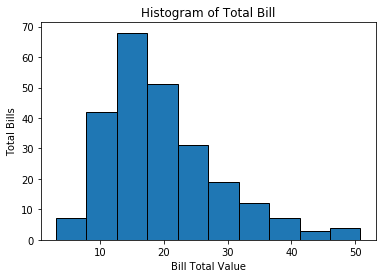

In [9]:
# Plot the distribution of total_bill
plt.hist('total_bill', edgecolor='k', data=df) # https://stackoverflow.com/a/42741774
plt.xlabel("Bill Total Value")
plt.ylabel("Total Bills")
plt.title("Histogram of Total Bill")

The total_bill distribution appears skewed to the right. This was evident from the basic descriptive statistics above, which indicated a different mean and median, and that 25% of payers paid more than $24 for their meal.

Text(0.5, 1.0, 'Histogram of Tip')

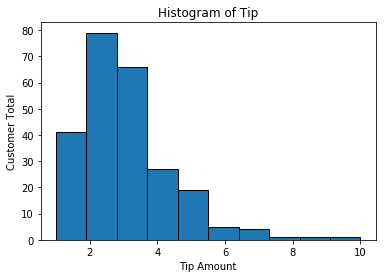

In [10]:
# Plot the distribution of tip
plt.hist('tip', edgecolor='k', data=df) 
plt.xlabel("Tip Amount")
plt.ylabel("Customer Total")
plt.title("Histogram of Tip")

Like total_bill, tip also appears positively skewed. This is to be expected from the descriptive stats above, but might also be related to the fact that tip is often tied to total bill amount (10% of total bill is often customary). We can explore whether such an association exists through a scatterplot:

Text(0.5, 1.0, 'Scatterplot of total_bill to tip')

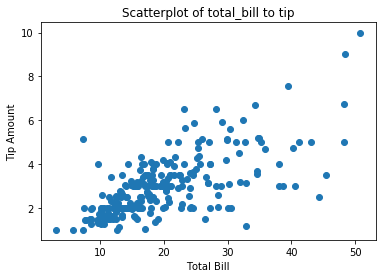

In [11]:
# Scatterplot of association between total_bill and tip
plt.scatter('total_bill', 'tip', data=df)
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Scatterplot of total_bill to tip")

It does indeed appear that there might be a linear relationship between total_bill and tip. We will determine what that relationship might be in the 'Regression' section below.

## Regression Analysis

We can begin by determining if there is a correlation between tip and total_bill. The [assumptions][1] of using a Pearson correlation coeffecient hold true here:
1. Continuous variables
2. Linear relationship as indicated by the scatterplot above
3. No significant outliers as indicated by the histograms and descriptive statistics above
4. Relatively normal distribution as indicated by the histogram

[1]: https://statistics.laerd.com/spss-tutorials/pearsons-product-moment-correlation-using-spss-statistics.php

In [12]:
# Create df with total_bill and tip only
x = df[['total_bill', 'tip']]

# Determine Pearson coeffecient
x.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


A Pearson coeffecient of 0.68 [indicates][1] a large positive assocation between total_bill and tip. Next, we can determine the size of that relationship with a regression analysis.

[1]: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

In [13]:
# Compute regression line of best fit
reg = np.polyfit(df['total_bill'], df['tip'], 1)
m = reg[0]
c = reg[1]
print(f"""The slope of the regression line is {m:.2f}, and the intercept is {c:.2f}. 
That is, for every $1 increase in bill total, there is a commensurate ${m:.2f} increase in the tip amount""")

The slope of the regression line is 0.11, and the intercept is 0.92. 
That is, for every $1 increase in bill total, there is a commensurate $0.11 increase in the tip amount


Text(0, 0.5, 'Tip amount')

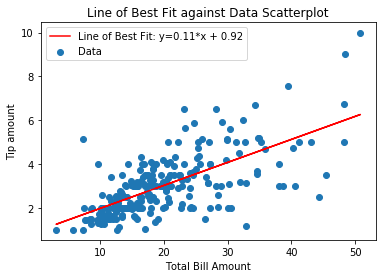

In [14]:
# Plot regression line to scatterplot
plt.scatter('total_bill', 'tip', data=df, label='Data')
plt.plot(df['total_bill'], df['total_bill'] * m + c, 'r', label=f'Line of Best Fit: y={m:.2f}*x + {c:.2f}')

# Add plot details
plt.legend()
plt.title("Line of Best Fit against Data Scatterplot")
plt.xlabel("Total Bill Amount")
plt.ylabel("Tip amount")

We can use the best fit line equation to calculate the likely tip from a given total bill amount.

In [15]:
# Extract random total_bill and corresponding tip amount from dataset
test = df.loc[np.random.randint(len(df)), ['total_bill', 'tip']]
bill = test[0]
realtip = test[1]

print(f'The random total_bill from the dataset is {bill} and the corresponding tip is {realtip}')

The random total_bill from the dataset is 24.06 and the corresponding tip is 3.6


In [16]:
# Calculate the tip using the above total_bill amount and applying it to the regression equation
# print(reg[0])
# print(test[0])
calctip = m * bill + c
print(f'The tip amount according to the regression equation is {calctip:.2f}. This is a difference of {(realtip - calctip):.2f}. (Actual = {test[1]})')

The tip amount according to the regression equation is 3.45. This is a difference of 0.15. (Actual = 3.6)


We can run the above random extraction and comparison of the regression value against the actual value several times and estimate how often the regression equation is correct.

In [17]:
# Create a list of tuples (actual tip amount, calculated tip amount) from 1,000 tries
compar = []
for i in range(1000):
    realtip = df['tip'].loc[np.random.randint(len(df))]
    # print(realtip)
    # print("Actual tip: ", realtip)
    calctip = round(m * realtip + c, 2)
    compar.append((realtip, calctip))

In [18]:
# Import this list into a dataframe for analysis
compardf = pd.DataFrame(compar, columns=['Actual', 'Calculated'])

# Confirm that dataframe correctly created
print(compardf.head())
print(compardf.tail())

   Actual  Calculated
0    3.25        1.26
1    3.15        1.25
2    3.60        1.30
3    1.71        1.10
4    1.92        1.12
     Actual  Calculated
995    2.09        1.14
996    3.50        1.29
997    4.00        1.34
998    1.50        1.08
999    2.50        1.18


In [19]:
# Determine the mean of the two columns
compardf.mean()

Actual        2.93624
Calculated    1.22914
dtype: float64

We can see that the mean of the actual tip is much larger than the mean of the tips calculated from the regression equation. This is also evident in the following plot:

Text(0.5, 1.0, 'Histogram of actual tips versus tips calculated from regression equation')

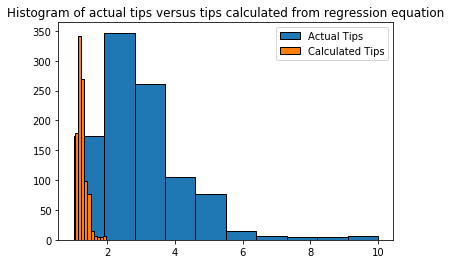

In [20]:
# Plot a histrogram of the two distributions
plt.hist(compardf['Actual'], edgecolor='k', label='Actual Tips')
plt.hist(compardf['Calculated'], edgecolor='k', label='Calculated Tips')

# Add plot details
plt.legend()
plt.title("Histogram of actual tips versus tips calculated from regression equation")

This indicates that although a regression equation can offer us some understanding of what the size of the relationship between two variables is, it is not necessarily deterministic, and is only a 'Best Fit'. 

## Analysis of Variables

In this section, we analyse the relationship between some of the variables. We will be looking at the data from the perspective of an employee, attempting to identify the nature of the variables that would maximise income from tips. Before doing so, we will create a new variable: `tip_perc`. This variable is the tip amount from the original dataset expressed as a percentage of the total bill, rounded to two decimal places. As it is often customary to leave a tip as a percentage of the total bill, evaluating how various variables influence this tip percentage may be of interest to an employee.

In [68]:
# Create new column indicating tip percentage of total_bill
df['tip_perc'] = round(df.tip/df.total_bill*100 ,2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


Now we can evaluate the relationship between the various numerical variables using a pairplot.

Text(0.33, 1.02, 'Pairplot of numerical relationships')

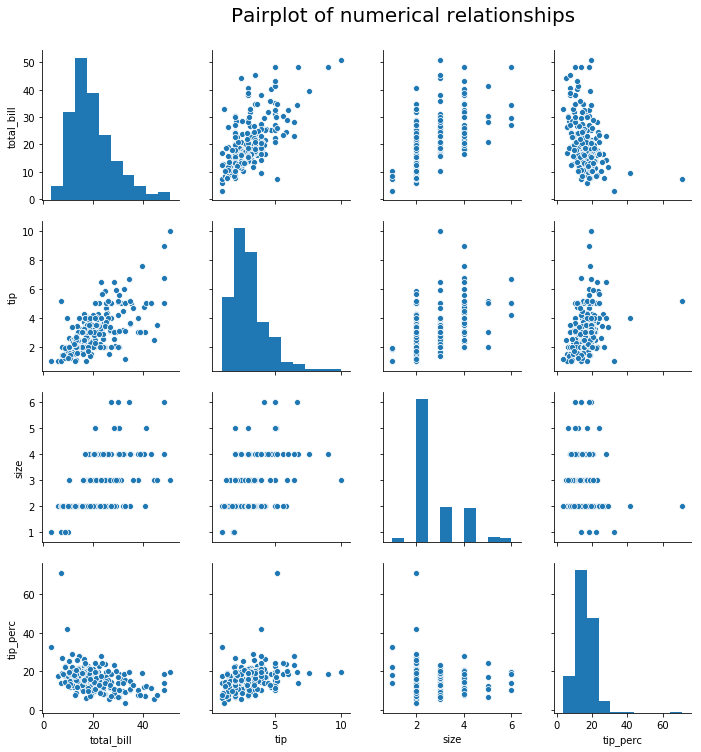

In [69]:
# Create a pairplot of all numerical variables
sns.pairplot(df).fig.text(0.33, 1.02, "Pairplot of numerical relationships", fontsize=20) # https://stackoverflow.com/a/32523784

It would seem that there are possibly other linear relationships present within the dataset. A correlation coefficient matrix may indicate the nature and size of potential relationships.

In [23]:
# Correlation coefficient matrix of relationships
df.corr()

,total_bill,tip,size,tip_perc
total_bill,1.000000,0.675734,0.598315,-0.338629
tip,0.675734,1.000000,0.489299,0.342361
size,0.598315,0.489299,1.000000,-0.142844
tip_perc,-0.338629,0.342361,-0.142844,1.000000


It is interesting to note that ther is a small negative correlation between tip_perc, and total_bill and group size. A linear regression may better reveal this:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.1, 1.02, 'Pairplot of numerical relationships with regression lines')

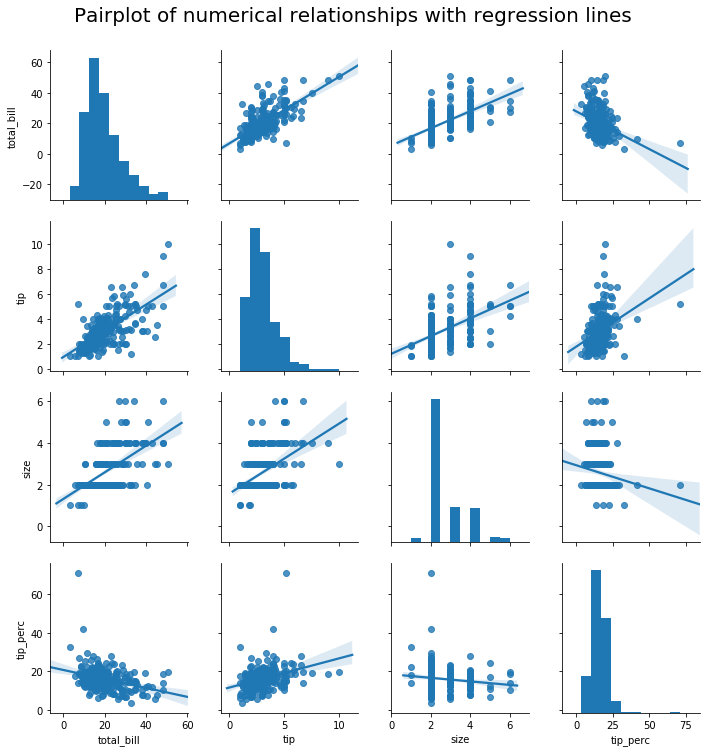

In [24]:
# Generate a linear regression on each pairplot - https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df, kind='reg').fig.text(0.10, 1.02, "Pairplot of numerical relationships with regression lines", fontsize=20)

It would seem that even though the *absolute* amount of the tip is positively correlated with the total bill amount, the *relative* amount of the tip is negatively correlated with the total bill amount. It would also appear that there is a small negative correlation between tip_perc and size. However, this may be due to a few outliers. Let's remove the outlying observations (>= 30% tip_perc) and reassess:

In [51]:
# Identify outliers of >50% tip_perc
df[df['tip_perc'] >= 30]

,total_bill,tip,sex,smoker,day,time,size,tip_perc
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.57
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.67


In [57]:
# Create copy of df without outliers
dfcopy = df[df['tip_perc'] < 30]

# Confirm that dfcopy has 3 less observations (df = 244)
dfcopy.describe()

,total_bill,tip,size,tip_perc
count,241.000000,241.000000,241.000000,241.000000
mean,19.949585,2.993485,2.580913,15.677137
std,8.829799,1.377771,0.950158,4.599578
min,5.750000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,12.820000
50%,17.820000,2.880000,2.000000,15.380000
75%,24.270000,3.510000,3.000000,18.840000
max,50.810000,10.000000,6.000000,29.200000


In [53]:
# Correlation coeffecient matrix on dfcopy
dfcopy.corr()

,total_bill,tip,size,tip_perc
total_bill,1.000000,0.694102,0.591701,-0.331650
tip,0.694102,1.000000,0.493793,0.388972
size,0.591701,0.493793,1.000000,-0.122759
tip_perc,-0.331650,0.388972,-0.122759,1.000000


In [55]:
# Correlation coeffecient matrix on original df
df.corr()

,total_bill,tip,size,tip_perc
total_bill,1.000000,0.675734,0.598315,-0.338629
tip,0.675734,1.000000,0.489299,0.342361
size,0.598315,0.489299,1.000000,-0.142844
tip_perc,-0.338629,0.342361,-0.142844,1.000000


There does not appear to be a large difference with removal of the outliers, confirmed by the following visual plot:

Text(0.0, 1.02, 'Pairplot of numerical relationships with regression lines, tip_perc outliers removed')

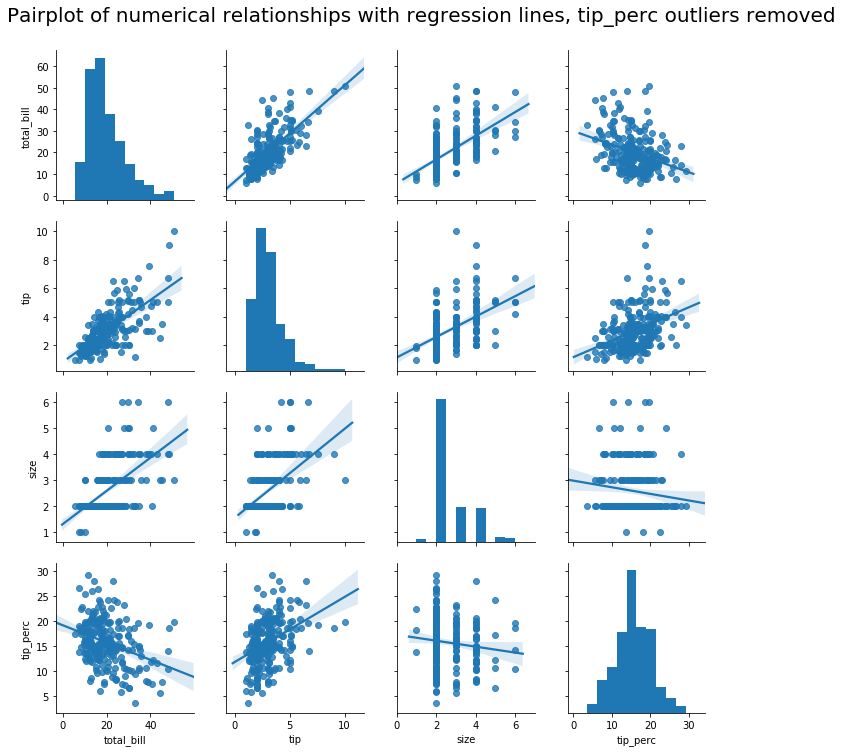

In [70]:
sns.pairplot(dfcopy, kind='reg').fig.text(0.0, 1.02, "Pairplot of numerical relationships with regression lines, tip_perc outliers removed", fontsize=20)

Because the direction and size of the relationships between variables is unchanged, we will continue with the original dataset contained within the `df` variable.

First, it might help to identify the most profitable day in terms of *absolute* tip amounts:

In [76]:
# Determine sum of tips by day
df.groupby('day').sum().tip # source: https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

It would appear Saturday is the most profitable in terms of total tips. However, if we assume that size of total_bill equates to amount of effort on the part of the employee, the *relative* tip amount is of more interest.

In [96]:
# Determine total bills by day
df.groupby('day').sum().total_bill

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [79]:
# Determine total relative tip amount as percentage of total_bill
round((df.groupby('day').sum().tip/df.groupby('day').sum().total_bill)*100, 2)

day
Fri     15.94
Sat     14.64
Sun     15.20
Thur    15.67
dtype: float64

Although Saturday offers the most in *total* tips, it offers the least in *relative* tips. Based on our assumption of **total_bill = effort**, we could argue that Saturday offers the least return on effort based on tips. 

Next, we will explore if gender has any association with the variables by visual exploration through a pairplot:

Text(0.0, 1.02, 'Pairplot of numerical relationships with regression lines by gender')

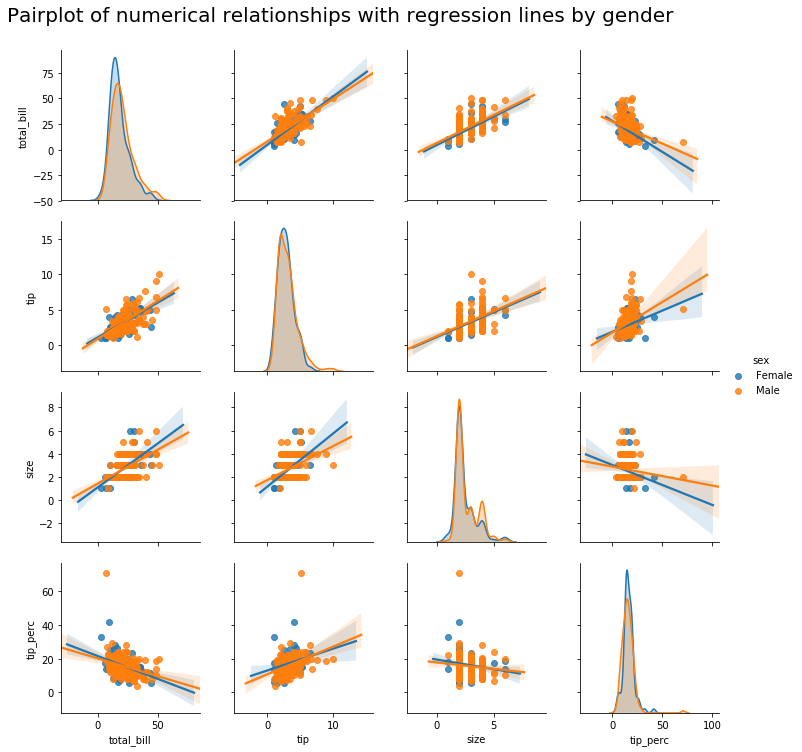

In [67]:
# Generate a linear regression on each pairplot, with gender 
sns.pairplot(df, kind='reg', hue='sex').fig.text(0.0, 1.02, "Pairplot of numerical relationships with regression lines by gender", fontsize=20)

Although it would appear there are differences between the gender regression lines in some variables, the fact that the zone of confidence ([95% confidence interval][1] indicated by the shaded area) overlap on each line indicates that there is no significant difference between genders.

[1]: https://seaborn.pydata.org/tutorial/regression.html

Next, let's see if being a smoker makes a difference:

Text(0.0, 1.02, 'Pairplot of numerical relationships with regression lines by smoking status')

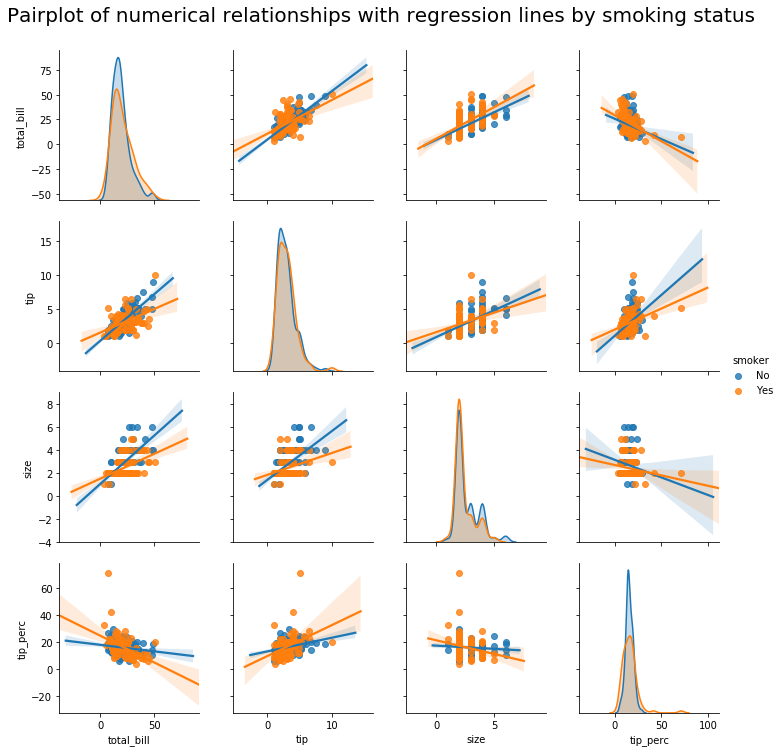

In [66]:
# Generate a linear regression on each pairplot, smoker
sns.pairplot(df, kind='reg', hue="smoker").fig.text(0.0, 1.02, "Pairplot of numerical relationships with regression lines by smoking status", fontsize=20)

It would appear that there may be significant differences between smokers on certain variables, with smokers more likely to leave a larger *relative* tip on a smaller total bill compared to non-smokers. 

In [25]:
# Compare descriptive statistics across gender - Male
round(df.loc[df.loc[: , 'sex'] == 'Male'].describe(),2)

,total_bill,tip,size,tip_perc
count,157.00,157.00,157.00,157.00
mean,20.74,3.09,2.63,15.76
std,9.25,1.49,0.96,6.48
min,7.25,1.00,1.00,3.56
25%,14.00,2.00,2.00,12.14
50%,18.35,3.00,2.00,15.35
75%,24.71,3.76,3.00,18.62
max,50.81,10.00,6.00,71.03


In [26]:
# Compare descriptive statistics across gender - Female
round(df.loc[df.loc[: , 'sex'] == 'Female'].describe(),2)

,total_bill,tip,size,tip_perc
count,87.00,87.00,87.00,87.00
mean,18.06,2.83,2.46,16.65
std,8.01,1.16,0.94,5.36
min,3.07,1.00,1.00,5.64
25%,12.75,2.00,2.00,14.04
50%,16.40,2.75,2.00,15.56
75%,21.52,3.50,3.00,19.42
max,44.30,6.50,6.00,41.67


In [27]:
# Identify the unique names used in variables of dtype object: sex, smoker, day, time, size 
for data in df.iloc[:, 2:6]:
    print("Unique names for variable:")
    print(df.groupby(data).size())
    print()

Unique names for variable:
sex
Female     87
Male      157
dtype: int64

Unique names for variable:
smoker
No     151
Yes     93
dtype: int64

Unique names for variable:
day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

Unique names for variable:
time
Dinner    176
Lunch      68
dtype: int64



In [28]:
# Describe new variable
df['perc'].describe()

KeyError: 'perc'

In [ ]:
# What was the bill with the largest tip
df[df.perc == 71.03]

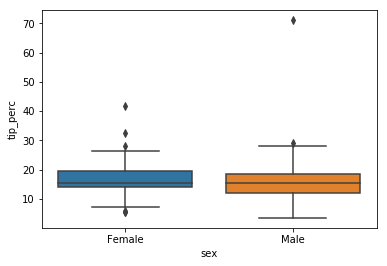

In [30]:
# Is there a difference in percentage tip by gender?
sns.boxplot(x='sex', y='tip_perc', data=df)

In [ ]:
# Is there an association between tip percentage and party size?
sns.relplot(x='size', y='perc', kind="line", data=df)

In [ ]:
# Is there a relationship between tip percentage and total bill amount?
sns.scatterplot(x="total_bill", y="perc", data=df)

In [ ]:
# What section of tips fall below 16%?
# Source: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py
sns.scatterplot(x="total_bill", y="perc", data=df)
plt.axhline(y=16, color="red", ls="--", linewidth=1)

In [ ]:
sns.lineplot(x="total_bill", y="perc", data=df)

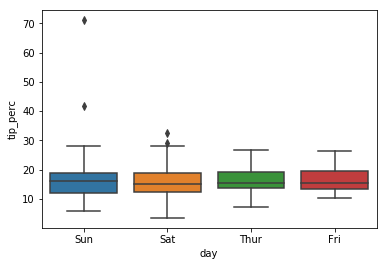

In [97]:
# Is there a relationship between day of week and tip percentage?
sns.boxplot(x="day", y="tip_perc", data=df)

In [ ]:
# Is there a relationship between time of meal and tip percentage?
sns.boxplot(x="time", y="perc", data=df)

In [ ]:
# What day offers the largest absolute tip amount?
df.groupby('day').sum().tip # source: https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

In [ ]:
# What is the smallest total bill that gives at least the average percentage tip (16%)?
df2 = df[df.perc > 16].sort_values(by=['total_bill'])
f"The smallest total bill amount with a percentage tip of more than 16% is {df2.iloc[0,0]}"

In [ ]:
df.groupby('day').describe()['tip']

The most reliable time for waitstaff to make money from tips is lunch time on a Friday, ideally a group of 1-2 people with a female paying, with total bills starting at as little as 3.07. It would also appear that there is diminishing returns on larger bill amounts. However, more total amount in tips can be made on a Saturday. 

### References
- pandas website
- matplotlib tutorial
- python documentation
- https://statistics.laerd.com/spss-tutorials/pearsons-product-moment-correlation-using-spss-statistics.php
- https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php
- https://thispointer.com/pandas-how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-python/
- https://seaborn.pydata.org/tutorial/regression.html